In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Extra dependencies and imports needed
from sqlalchemy import inspect
import pandas as pd
import re
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

#### Inspect measurement table columns and types

In [5]:
inspector = inspect(engine)
column_names = inspector.get_columns('measurement')
for col in column_names:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
june_temp

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
#  3. Convert the June temperatures to a list.
june_temp_list = [row.tobs for row in june_temp]
june_temp_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_df = pd.DataFrame(june_temp_list, columns = ['June Temps'])
june_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [11]:
# 7. Convert the December temperatures to a list.

dec_temp_list = [row.tobs for row in dec_temp]
dec_temp_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp_list, columns = ['Dec Temps'])
dec_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Extra Analysis to Get More Information for Deliverable 3

### Calculate the Avg Temp of Each Year for June and December

In [14]:
# Create a DataFrame with June date and temperature

jun_date_temp_df = pd.DataFrame(june_temp, columns = ['date', 'June Temps'])

# Create a DataFrame with June date and temperature 
dec_date_temp_df = pd.DataFrame(dec_temp, columns = ['date', 'Dec Temps'])
dec_date_temp_df.head()

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


#### Average June temperature for every year

In [15]:
# Find the average June temperature for every year
june_group = jun_date_temp_df.groupby(pd.DatetimeIndex(jun_date_temp_df['date']).year)

# Calculate the average June temperature for every year.
june_avg = june_group.aggregate({'June Temps':np.mean})
june_avg

,June Temps
date,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


#### Average December temperature for every year

In [16]:
# Find the average December temperature for each year. 
dec_group = dec_date_temp_df.groupby(pd.DatetimeIndex(dec_date_temp_df['date']).year)

# Calculate the average December temperature for every year.
dec_avg = dec_group.aggregate({'Dec Temps': np.mean})
dec_avg

,Dec Temps
date,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


#### Merge the June and December temperature data

In [17]:
# Merge the June and Dec DataFrames on year. Do an inner join
jun_dec_df = pd.merge(june_avg, dec_avg, how = 'inner', on = 'date',
                       sort = True)
jun_dec_df

,June Temps,Dec Temps
date,,
2010,74.925620,70.208511
2011,73.938326,70.820628
2012,74.000000,71.188073
2013,74.599078,71.094017
2014,75.027907,69.896861
2015,74.990148,73.423913
2016,75.175258,71.130000


### Plot the Average June and December data for Comparison

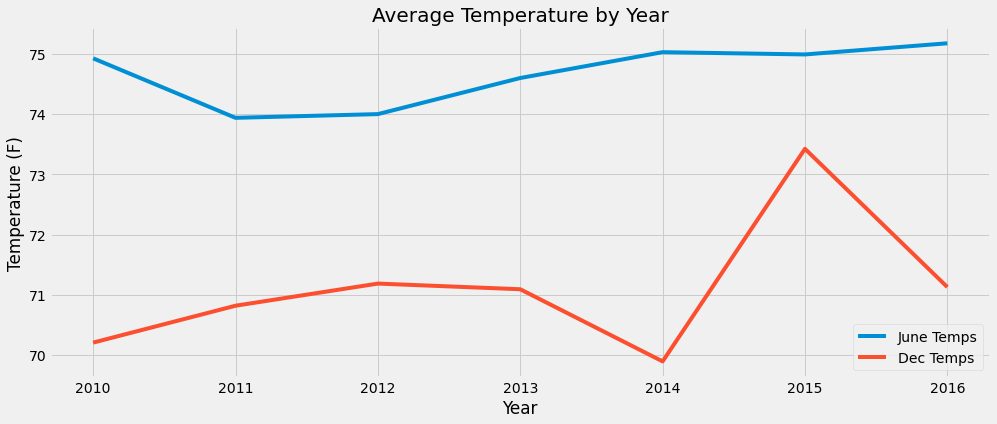

In [18]:
# Plot the June data and the December data
jun_dec_temp = jun_dec_df.plot(figsize = (15,6))
jun_dec_temp.set_title('Average Temperature by Year', fontsize = 20)
jun_dec_temp.set_xlabel("Year")
jun_dec_temp.set_ylabel("Temperature (F)")
jun_dec_temp.grid(True)

plt.savefig("Resources/June_Dec_Temp.png")
plt.show()


### Plot December 2015 temperature data to see if anything unusual happened that year

In [19]:
# Get the Dec 2015 data

dec_2015_results = session.query(Measurement.date,Measurement.tobs)\
.filter((Measurement.date >= '2015-12-01')&
        (Measurement.date <= '2015-12-31')).all()

dec_2015_df = pd.DataFrame(dec_2015_results, columns = ['date', 'Dec Temps'])
dec_2015_df.head()

,date,Dec Temps
0,2015-12-01,75.0
1,2015-12-02,77.0
2,2015-12-03,75.0
3,2015-12-04,75.0
4,2015-12-05,75.0


In [20]:
# Find the average December temperature for every day of the month. 
dec_2015_group = dec_2015_df.groupby(pd.DatetimeIndex(dec_2015_df['date']).day)

# Calculate the average December temperature for every year.
dec_2015_avg = dec_2015_group.aggregate({'Dec Temps': np.mean})

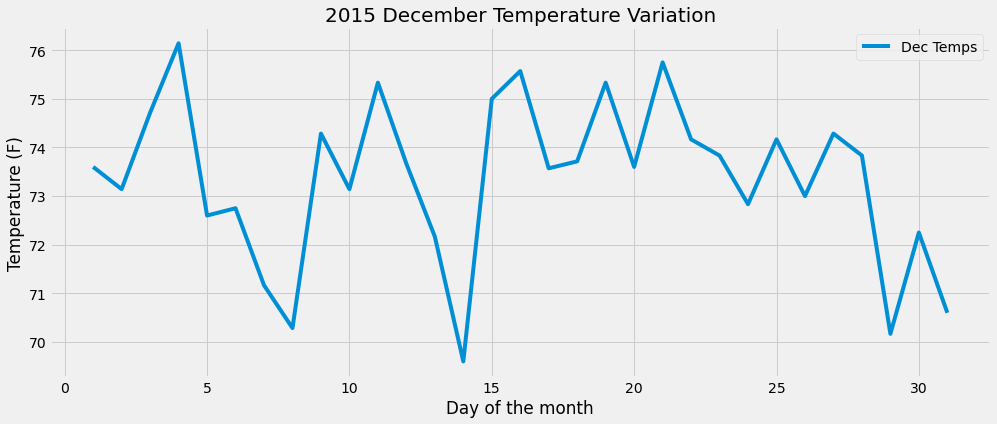

In [21]:
dec_2015_temp = dec_2015_avg.plot(figsize = (15,6))
dec_2015_temp.set_title('2015 December Temperature Variation', fontsize = 20)
dec_2015_temp.set_xlabel("Day of the month")
dec_2015_temp.set_ylabel("Temperature (F)")
dec_2015_temp.grid(True)

plt.savefig("Resources/Dec_Temp_2015.png")
plt.show()

#### Find the statistics of the 2015 December temperature 

In [22]:
# Find the statistics of 2015 December temperature
dec_2015_avg.describe()

,Dec Temps
count,31.000000
mean,73.363671
std,1.681494
min,69.600000
25%,72.675000
50%,73.600000
75%,74.285714
max,76.142857


### Check June and December precipitation

In [23]:
# Get June and December precipitation

june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

In [24]:
# Create a DataFrame for June and December precipitation
june_date_prcp_df = pd.DataFrame(june_prcp, columns = ['date','June prcp'])

dec_date_prcp_df = pd.DataFrame(dec_prcp, columns = ['date','Dec prcp'])

In [25]:
# Calculate the average June precipitation by year
june_prcp_group = june_date_prcp_df.groupby(pd.DatetimeIndex(june_date_prcp_df['date']).year)

# Calculate the average June temperature for every year.
june_prcp_avg = june_prcp_group.aggregate({'June prcp':np.mean})
june_prcp_avg


,June prcp
date,
2010,0.042241
2011,0.240142
2012,0.097062
2013,0.144195
2014,0.124372
2015,0.125160
2016,0.212312
2017,0.120000


In [26]:
# Calculate average December precipitation by year
dec_prcp_group = dec_date_prcp_df.groupby(pd.DatetimeIndex(dec_date_prcp_df['date']).year)

# Calculate the average June temperature for every year.
dec_prcp_avg = dec_prcp_group.aggregate({'Dec prcp':np.mean})
dec_prcp_avg


,Dec prcp
date,
2010,0.459087
2011,0.201581
2012,0.089604
2013,0.169014
2014,0.188439
2015,0.169506
2016,0.199494


In [27]:
# Merge the two July and December data frames shown by year.
jun_dec_prcp_df = pd.merge(june_prcp_avg, dec_prcp_avg, how = 'inner', on = 'date',
                       sort = True)
jun_dec_prcp_df

,June prcp,Dec prcp
date,,
2010,0.042241,0.459087
2011,0.240142,0.201581
2012,0.097062,0.089604
2013,0.144195,0.169014
2014,0.124372,0.188439
2015,0.125160,0.169506
2016,0.212312,0.199494


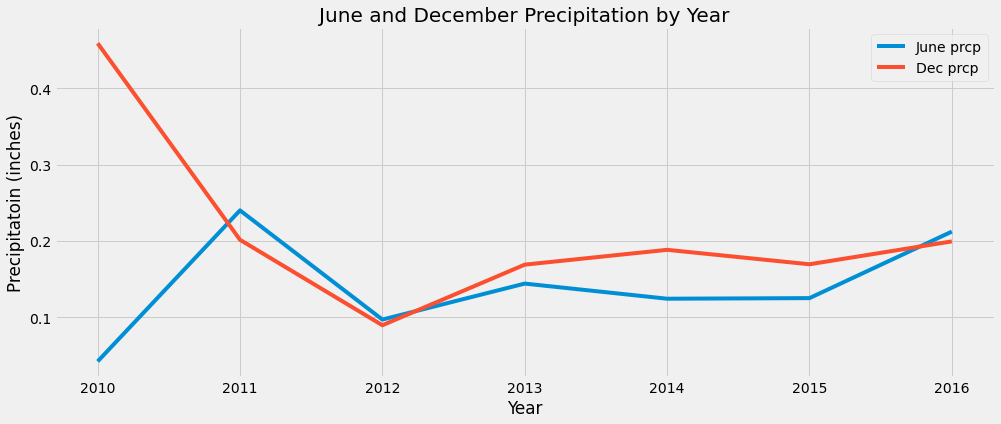

In [28]:
# Plot the average pricipitation data for June and Dec for comparison.
june_dec_prcp = jun_dec_prcp_df.plot(figsize = (15,6))
june_dec_prcp.set_title('June and December Precipitation by Year', fontsize = 20)
june_dec_prcp.set_xlabel('Year')
june_dec_prcp.set_ylabel('Precipitatoin (inches)')
june_dec_prcp.grid(True)

plt.savefig('Resources/June_Dec_prcp.png')
plt.show()

In [29]:
# Get the Dec 2015 prcp data

dec_2015_prcp_results = session.query(Measurement.date,Measurement.prcp)\
.filter((Measurement.date >= '2015-12-01')&
        (Measurement.date <= '2015-12-31')).all()

dec_2015_prcp_df = pd.DataFrame(dec_2015_prcp_results, columns = ['date', 'Dec prcp'])

In [30]:
# Find the average December precipitation for every day of the month. 
dec_2015_prcp_group = dec_2015_prcp_df.groupby(pd.DatetimeIndex(dec_2015_df['date']).day)

# Calculate the average December temperature for every day.
dec_2015_prcp_avg = dec_2015_prcp_group.aggregate({'Dec prcp': np.mean})
dec_2015_prcp_avg

,Dec prcp
date,
1,0.012500
2,0.068333
3,0.188333
4,0.016667
5,0.066000
6,0.167500
7,0.015000
8,0.051667
9,0.115000


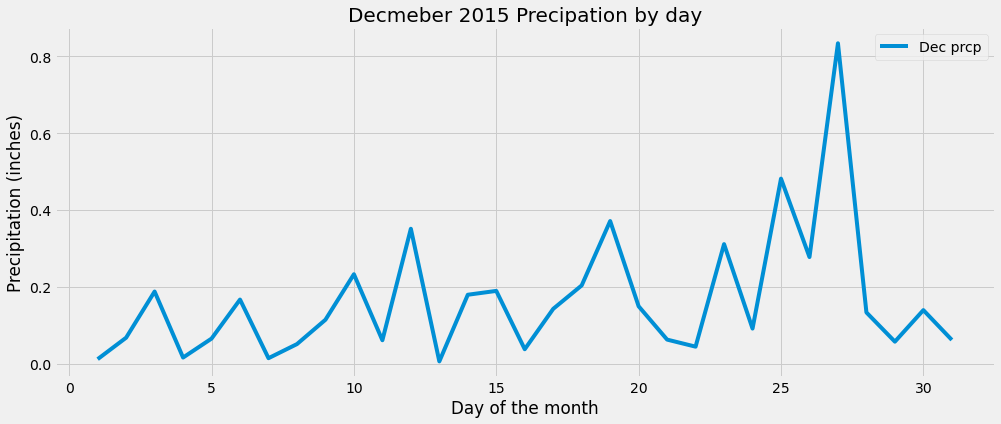

In [31]:
# Plot the December 2015 precipitation
dec_2015_prcp = dec_2015_prcp_avg.plot(figsize = (15,6))
dec_2015_prcp.set_title('Decmeber 2015 Precipation by day', fontsize = 20)
dec_2015_prcp.set_xlabel('Day of the month')
dec_2015_prcp.set_ylabel('Precipitation (inches)')
dec_2015_prcp.grid(True)

plt.savefig('Resources/Dec2015_prcp.png')
plt.show()